In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

In [2]:
my_cols = ["country", "country_long", "name", "gppd_idnr", "capacity_mw",  "latitude", "longitude", "fuel1", "fuel2", "fuel3", "fuel4", "commissioning_year", "owner", "source", "url", "geolocation_source", "year_of_capacity_data", "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "estimated_generation_gwh"]
energy_type = pd.read_csv("global_power_plant_database.csv", names=my_cols, engine='python')



In [3]:
conv_arr = energy_type.values
fuel = conv_arr[:,7]
output = conv_arr[:,21]


print(energy_type.fuel1.unique())

['fuel1' 'Hydro' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Solar'
 'Waste' 'Biomass' 'Wave and Tidal' 'Geothermal' nan 'Cogeneration'
 'Storage' 'Petcoke']


In [4]:
hydro = []
gas = []
oil = []
wind = []
nuclear = []
coal = []
solar = []
waste = []
biomass = []
wave = []
geothermal = []
cogeneraton = []
storage = []
petcoke = []
for index, row in energy_type.iterrows():
    if row["fuel1"] == "Hydro":
        hydro.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Gas":
        gas.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Oil":
        oil.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Wind":
        wind.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Nuclear":
        nuclear.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Coal":
        coal.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Solar":
        solar.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Waste":
        waste.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Biomass":
        biomass.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Wave and Tidal":
        wave.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Geothermal":
        geothermal.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Cogeneration":
        cogeneraton.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Storage":
        storage.append(row["estimated_generation_gwh"])
    elif row["fuel1"] == "Petcoke":
        petcoke.append(row["estimated_generation_gwh"])
        
hydro = np.asarray(hydro, dtype="float")
gas = np.asarray(gas, dtype="float")
oil = np.asarray(oil, dtype="float")
wind = np.asarray(wind, dtype="float")
nuclear = np.asarray(nuclear, dtype="float")
coal = np.asarray(coal, dtype="float")
solar = np.asarray(solar, dtype="float")
waste = np.asarray(waste, dtype="float")
biomass = np.asarray(biomass, dtype="float")
wave = np.asarray(wave, dtype="float")
geothermal = np.asarray(geothermal, dtype="float")
cogeneraton = np.asarray(cogeneraton, dtype="float")
storage = np.asarray(storage, dtype="float")
petcoke = np.asarray(petcoke, dtype="float")



In [5]:
data = {"Values": [np.nansum(hydro), np.nansum(gas), np.nansum(oil), np.nansum(wind), np.nansum(nuclear), np.nansum(coal), np.nansum(solar), np.nansum(waste), 
        np.nansum(biomass), np.nansum(wave), np.nansum(geothermal), np.nansum(cogeneraton), np.nansum(storage), np.nansum(petcoke)],
        "labels": ["Hydro", "Gas", "Oil", "Wind", "Nuclear", "Coal", "Solar", "Waste", "Biomass", "Tidal", "Geothermal",
          "Cogeneration", "Storage", "Petcoke"]}

df = pd.DataFrame(data).sort_values('Values', ascending=False)
df2 = df[:6].copy()
new_row = pd.DataFrame(data = {"labels": ['Others'], "Values": [df['Values'][6:].sum()]})
df2 = pd.concat([df2, new_row])


/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [6]:
#df.plot(kind="pie", y="Values", labels=df["labels"], figsize=(10,10))

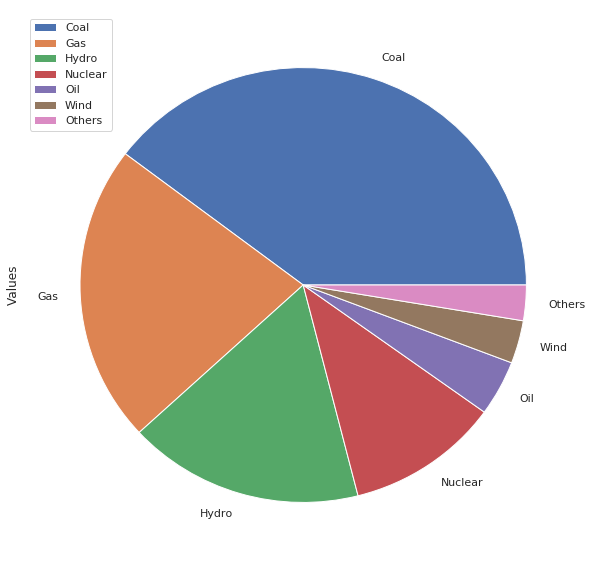

In [7]:
df2.plot(kind="pie", y="Values", labels=df2["labels"], figsize=(10,10))

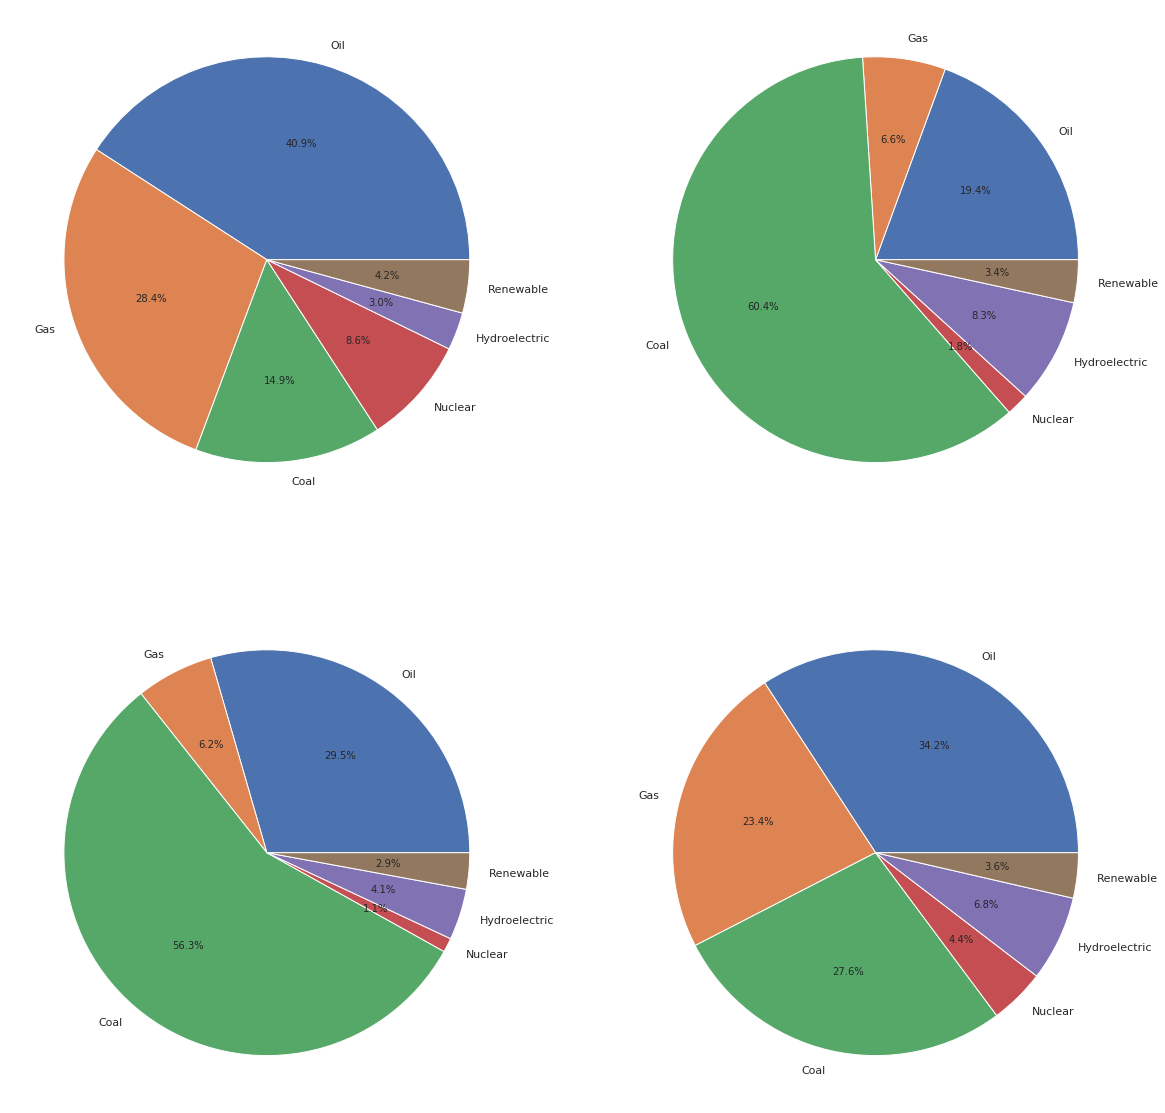

In [16]:
headings = ["Million tonnes oil equivalent", "Oil", "Natural Gas", "Coal", "Nuclear energy", 
            "Hydro electric", "Renewables", "Total"]

energy_type_country_2016 = pd.read_csv("2016consumption_by_type.csv", names=headings, engine='python')
energy_type_country_2017 = pd.read_csv("2017_consumption_by_type.csv", names=headings, engine='python')

conv2017 = energy_type_country_2017.values
conv2016 = energy_type_country_2016.values

print("Biggest Energy")

USA2017 = conv2017[2]
USA2016 = conv2016[2]

CHINA2017 = conv2017[65]
CHINA2016 = conv2016[65]
INDIA2017 = conv2017[67]
INDIA2016 = conv2016[67]
WORLD2017 = conv2017[82]
WORLD2016 = conv2016[82]

WORLD = {"2017": WORLD2017[1:-1], "2016": WORLD2016[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]}

INDIA = {"2017": INDIA2017[1:-1], "2016": INDIA2016[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]}

CHINA = {"2017": CHINA2017[1:-1], "2016": CHINA2016[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]}

USA = {"2017": USA2017[1:-1], "2016": USA2016[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]}

plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
ax1.axis("equal")
ax1.pie(USA["2017"], labels=USA["labels"], autopct="%1.1f%%")

ax2 = plt.subplot(2, 2, 2)
ax2.axis("equal")
ax2.pie(CHINA["2017"], labels=CHINA["labels"], autopct="%1.1f%%")

ax3 = plt.subplot(2, 2, 3)
ax3.axis("equal")
ax3.pie(INDIA["2017"], labels=INDIA["labels"], autopct="%1.1f%%")

ax4 = plt.subplot(2, 2, 4)
ax4.axis("equal")
ax4.pie(WORLD["2017"], labels=WORLD["labels"], autopct="%1.1f%%")

plt.show()

In [ ]:
hydro = []
gas = []
oil = []
wind = []
nuclear = []
coal = []
solar = []
waste = []
biomass = []
wave = []
geothermal = []
cogeneraton = []
storage = []
petcoke = []

fossil = []
for index, row in energy_type.iterrows():
    if row["fuel1"] == "Hydro":
        hydro.append(row["commissioning_year"])
    elif row["fuel1"] == "Gas":
        gas.append(row["commissioning_year"])
        fossil.append(row["commissioning_year"])
    elif row["fuel1"] == "Oil":
        oil.append(row["commissioning_year"])
        fossil.append(row["commissioning_year"])
    elif row["fuel1"] == "Wind":
        wind.append(row["commissioning_year"])
    elif row["fuel1"] == "Nuclear":
        nuclear.append(row["commissioning_year"])
    elif row["fuel1"] == "Coal":
        coal.append(row["commissioning_year"])
        fossil.append(row["commissioning_year"])
    elif row["fuel1"] == "Solar":
        solar.append(row["commissioning_year"])
    elif row["fuel1"] == "Waste":
        waste.append(row["commissioning_year"])
    elif row["fuel1"] == "Biomass":
        biomass.append(row["commissioning_year"])
    elif row["fuel1"] == "Wave and Tidal":
        wave.append(row["commissioning_year"])
    elif row["fuel1"] == "Geothermal":
        geothermal.append(row["commissioning_year"])
    elif row["fuel1"] == "Cogeneration":
        cogeneraton.append(row["commissioning_year"])
    elif row["fuel1"] == "Storage":
        storage.append(row["commissioning_year"])
    elif row["fuel1"] == "Petcoke":
        petcoke.append(row["commissioning_year"])
        
hydro = np.asarray(hydro, dtype="float")
gas = np.asarray(gas, dtype="float")
oil = np.asarray(oil, dtype="float")
wind = np.asarray(wind, dtype="float")
nuclear = np.asarray(nuclear, dtype="float")
coal = np.asarray(coal, dtype="float")
solar = np.asarray(solar, dtype="float")
waste = np.asarray(waste, dtype="float")
biomass = np.asarray(biomass, dtype="float")
wave = np.asarray(wave, dtype="float")
geothermal = np.asarray(geothermal, dtype="float")
cogeneraton = np.asarray(cogeneraton, dtype="float")
storage = np.asarray(storage, dtype="float")
petcoke = np.asarray(petcoke, dtype="float")
fossil = np.asarray(fossil, dtype="float")

In [ ]:
fossil_unique, fossil_counts = np.unique(fossil, return_counts=True)
fig, ax1 = plt.subplots()
ax1.plot(fossil_unique, fossil_counts)
ax2 = ax1.twinx()
ax2.plot([1975, 1985, 1995, 2005, 2010, 2012, 2013, 2014], 
         [16853532, 19864139, 23120435, 29490014, 33472376, 
          35470891, 35837591, 36138285], color='#ff7f0e', lw=4)
ax1.set_xlabel("Year 1990 - 2020")
ax1.set_ylabel("Fossil Fuel Power Plants Opened Per Year",  multialignment='center')
ax2.set_ylabel("Annual Greenhouse Gas Emissions\n (Thousand metric tonnes)",  multialignment='center')
plt.show()